## NVIDIA (NVDA) Stock Price Prediction using Facebook Prophet

## Import necessary libraries

In [11]:
# Import necessary libraries

import pandas as pd  ## Data manipulation
import plotly.express as px  ## data visulization - default mode is off
from prophet import Prophet ## Forecasting

In [12]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

##Import the Dataset and Explore
- Using 1 year of NVDA stock price data since 28 Jul 2023.
- Dataset is loaded from Yahoo finance

In [13]:
df = pd.read_csv("NVDA.csv")

In [14]:
df ## NVDA stock on 2023.07.28 - 2024.07.28

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-28,46.667999,47.027000,46.381001,46.750000,46.736008,331194000
1,2023-07-31,46.754002,47.130001,46.506001,46.729000,46.715012,251055000
2,2023-08-01,46.459999,46.900002,46.027000,46.507000,46.493080,237858000
3,2023-08-02,45.831001,45.840000,43.387001,44.269001,44.255753,530142000
4,2023-08-03,43.799999,45.118000,43.799999,44.514999,44.501678,324176000
...,...,...,...,...,...,...,...
246,2024-07-22,120.349998,124.070000,119.860001,123.540001,123.540001,258068900
247,2024-07-23,122.779999,124.690002,122.099998,122.589996,122.589996,173911000
248,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900
249,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,72.055789,73.289542,70.624371,72.035526,72.027642,4.573149e+08
std,29.185290,29.755607,28.383494,29.071939,29.074566,1.535023e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,1.739110e+08
25%,46.470999,47.090500,45.507999,46.611500,46.605486,3.678450e+08
50%,61.231998,62.488998,60.700001,61.527000,61.519058,4.319290e+08
75%,90.302002,91.577499,88.731499,90.385502,90.378078,5.234430e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.156044e+09


##Data Visualization using plotly express
Visualizing the historical perfomance of Nvidia using line graph, area graph, and box plot to analyze the stock price and volume

In [18]:
px.area(df, x="Date", y="Close")

In [19]:
px.line(df, x="Date", y="Close")

In [20]:
px.area(df, x="Date", y="Volume")

In [21]:
px.bar(df, y="Volume")

In [22]:
px.box(df, y="Close")

### Data Preparation for Prophet

In [23]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-28,46.667999,47.027000,46.381001,46.750000,46.736008,331194000
1,2023-07-31,46.754002,47.130001,46.506001,46.729000,46.715012,251055000
2,2023-08-01,46.459999,46.900002,46.027000,46.507000,46.493080,237858000
3,2023-08-02,45.831001,45.840000,43.387001,44.269001,44.255753,530142000
4,2023-08-03,43.799999,45.118000,43.799999,44.514999,44.501678,324176000
...,...,...,...,...,...,...,...
246,2024-07-22,120.349998,124.070000,119.860001,123.540001,123.540001,258068900
247,2024-07-23,122.779999,124.690002,122.099998,122.589996,122.589996,173911000
248,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900
249,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000


In [24]:
columns=["Date", "Close"] ## Segregate 'Date' and 'Close' columns
ndf = pd.DataFrame(df, columns =columns) ## Create a new dataframe

In [25]:
ndf

,Date,Close
0,2023-07-28,46.750000
1,2023-07-31,46.729000
2,2023-08-01,46.507000
3,2023-08-02,44.269001
4,2023-08-03,44.514999
...,...,...
246,2024-07-22,123.540001
247,2024-07-23,122.589996
248,2024-07-24,114.250000
249,2024-07-25,112.279999


In [26]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [27]:
prophet_df

,ds,y
0,2023-07-28,46.750000
1,2023-07-31,46.729000
2,2023-08-01,46.507000
3,2023-08-02,44.269001
4,2023-08-03,44.514999
...,...,...
246,2024-07-22,123.540001
247,2024-07-23,122.589996
248,2024-07-24,114.250000
249,2024-07-25,112.279999


### Creating Facebook Prophet Model

In [28]:
# Train the model
m = Prophet()
m.fit(prophet_df) ## Import data and fit the data into model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl48xii6q/7rarviwb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl48xii6q/m6fjqf7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63297', 'data', 'file=/tmp/tmpl48xii6q/7rarviwb.json', 'init=/tmp/tmpl48xii6q/m6fjqf7h.json', 'output', 'file=/tmp/tmpl48xii6q/prophet_modeliwd2o4oz/prophet_model-20240804072111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting

In [29]:
future = m.make_future_dataframe(periods=30) ## Making a forecasted table for 30 days
forecast = m.predict(future) # Predict the model

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-28,43.980932,35.531655,51.030727,43.980932,43.980932,-0.754403,-0.754403,-0.754403,-0.754403,-0.754403,-0.754403,0.0,0.0,0.0,43.226529
1,2023-07-31,44.047965,36.281440,51.785498,44.047965,44.047965,-0.132392,-0.132392,-0.132392,-0.132392,-0.132392,-0.132392,0.0,0.0,0.0,43.915573
2,2023-08-01,44.070309,35.727521,51.246482,44.070309,44.070309,-0.191098,-0.191098,-0.191098,-0.191098,-0.191098,-0.191098,0.0,0.0,0.0,43.879212
3,2023-08-02,44.092654,35.767563,51.678500,44.092654,44.092654,-0.966848,-0.966848,-0.966848,-0.966848,-0.966848,-0.966848,0.0,0.0,0.0,43.125806
4,2023-08-03,44.114998,34.990046,51.105229,44.114998,44.114998,-0.665423,-0.665423,-0.665423,-0.665423,-0.665423,-0.665423,0.0,0.0,0.0,43.449575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2024-08-21,141.886624,133.020079,148.775116,141.412441,142.321658,-0.966848,-0.966848,-0.966848,-0.966848,-0.966848,-0.966848,0.0,0.0,0.0,140.919776
277,2024-08-22,142.284452,133.415526,149.581938,141.788026,142.738141,-0.665423,-0.665423,-0.665423,-0.665423,-0.665423,-0.665423,0.0,0.0,0.0,141.619030
278,2024-08-23,142.682281,134.084898,149.948929,142.159513,143.164769,-0.754403,-0.754403,-0.754403,-0.754403,-0.754403,-0.754403,0.0,0.0,0.0,141.927878
279,2024-08-24,143.080109,136.371231,152.690783,142.520412,143.583834,1.355081,1.355081,1.355081,1.355081,1.355081,1.355081,0.0,0.0,0.0,144.435190


In [31]:
px.line(forecast, x='ds', y='yhat')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



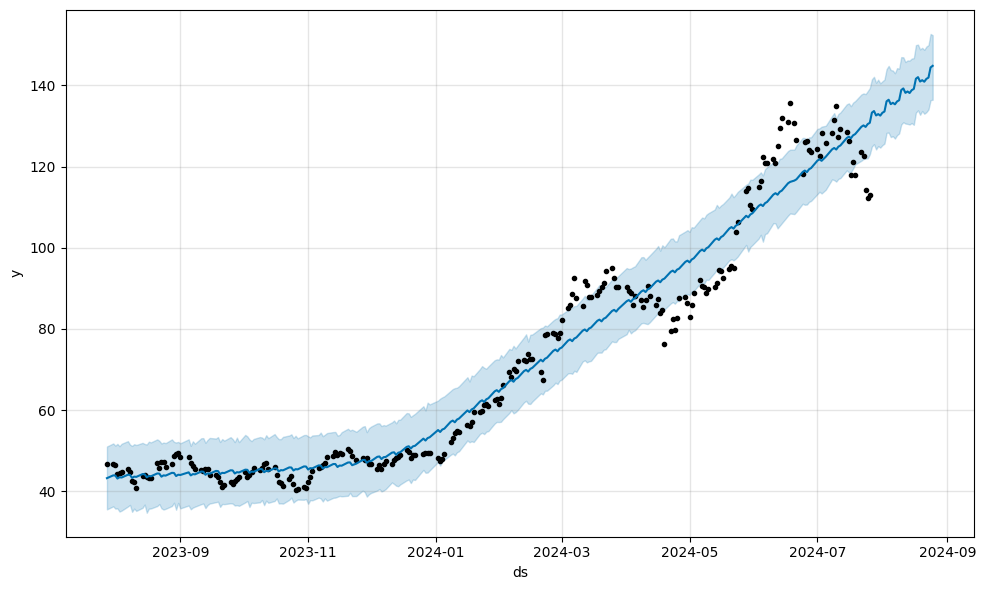

In [32]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



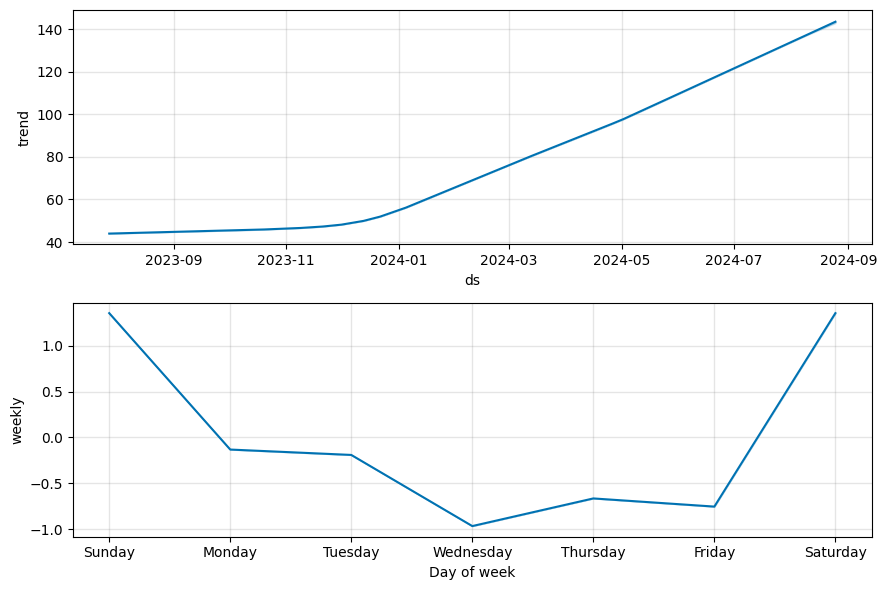

In [33]:
figure2 = m.plot_components(forecast) ##Trends of component - weekyly lower, quarterly upper

### Downloading the Forecast data

In [38]:
from google.colab import files
forecast.to_csv('NVDA_Forecast.csv') ## Create to CSV file
#files.download('NVDA_Forecast.csv') ## To download the NVDA_Forecast.csv